In [35]:
import os
from skimage.transform import resize
from skimage import feature
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from skimage import io, color, exposure, img_as_ubyte, filters, morphology, measure
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [64]:
imagen = io.imread('./data/healthy/Im040_0.jpg')

In [58]:
imagen = io.imread('./data/LLA/Im003_1.jpg')

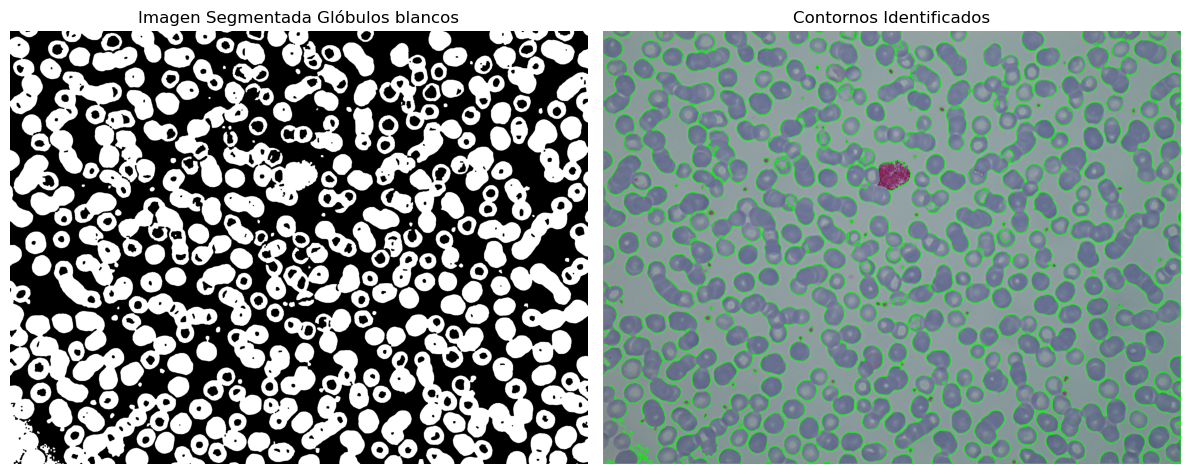

In [65]:
gray_image = color.rgb2gray(imagen)
# Convertir la imagen a tipo de datos uint8
gray_image_uint8 = img_as_ubyte(gray_image)

# Aplicar umbralización adaptativa
th, imagen_umbralizada = cv2.threshold(gray_image_uint8, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Invertir la imagen umbralizada
imagen_umbralizada = cv2.bitwise_not(imagen_umbralizada)

# Operaciones morfológicas para limpiar la imagen
kernel = np.ones((5, 5), np.uint8)
imagen_procesada = cv2.morphologyEx(imagen_umbralizada, cv2.MORPH_CLOSE, kernel)
imagen_procesada = cv2.morphologyEx(imagen_procesada, cv2.MORPH_OPEN, kernel)

# Detección de contornos
contornos, _ = cv2.findContours(imagen_procesada, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Dibujar contornos en una copia de la imagen original (en color)
imagen_segmentada = imagen.copy()
cv2.drawContours(imagen_segmentada, contornos, -1, (0, 255, 0), 2)

# Mostrar resultados
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.imshow(imagen_procesada, cmap='gray')
plt.title('Imagen Segmentada Glóbulos')
plt.axis('off')

plt.subplot(122)
plt.imshow(cv2.cvtColor(imagen_segmentada, cv2.COLOR_BGR2RGB))
plt.title('Contornos Identificados')
plt.axis('off')

plt.tight_layout()
plt.show()

In [66]:
# Imagen segmentada de glóbulos rojos y blancos
globulos = measure.label(imagen_procesada)
globulos = set(np.unique(globulos))
conteo = len(globulos)
print("Conteo de Glóbulos:", conteo)

Conteo de Glóbulos: 292
